# Marketing Analytics For E-Commerce Market Place Company

## Business Context:

The client is one of the leading online market place in India and would like partner with Analytixlabs. 
Client wants help in measuring, managing and analysing performance of business.
Analytixlabs has hired you as an analyst for this project where client asked you to provide data 
driven insights about business and understand customer, seller behaviors, product behavior and 
channel behavior etc...

## Business Objective:
The below are few Sample business questions to be addressed as part of this analysis.

### Import necessary libraries

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import permutations, combinations
from collections import Counter

### Import the data sets

In [3]:
customers = pd.read_csv('CUSTOMERS.csv')
sellers = pd.read_csv('SELLERS.csv')
products = pd.read_csv('PRODUCTS.csv')
orders = pd.read_csv('ORDERS.csv')
order_items = pd.read_csv('ORDER_ITEMS.csv')
order_payments = pd.read_csv('ORDER_PAYMENTS.csv')
order_review_ratings = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
geo_location = pd.read_csv('GEO_LOCATION.csv')

### Exploratory Data Analysis

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [5]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [7]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [8]:
sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [9]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [10]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [12]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [14]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [16]:
# Converting orders's order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date to datetime

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], format = '%m/%d/%Y %H:%M')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format = '%m/%d/%Y %H:%M')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], format = '%m/%d/%Y %H:%M')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], format = '%m/%d/%Y %H:%M')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], format = '%m/%d/%Y %H:%M')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26


In [17]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [18]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [19]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [20]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [21]:
## coverting order_items's shipping_limit_date to datetime
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"], format="%m/%d/%Y %H:%M")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14


In [22]:
order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [23]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [24]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
order_payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [26]:
order_review_ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [27]:
order_review_ratings.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [28]:
order_review_ratings.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [29]:
## converting order_review_ratings's review_creation_date & review_answer_timestamp to datetime
order_review_ratings["review_creation_date"] = pd.to_datetime(order_review_ratings["review_creation_date"], format="%m/%d/%Y %H:%M")
order_review_ratings["review_answer_timestamp"] = pd.to_datetime(order_review_ratings["review_answer_timestamp"], format="%m/%d/%Y %H:%M")
order_review_ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00


In [30]:
order_review_ratings.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [31]:
geo_location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [32]:
geo_location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [33]:
geo_location.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

## Q1. 
### (a) Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [34]:
total_revenue = order_payments.drop_duplicates(keep = 'first')['payment_value'].sum()
print('Total Revenue:', total_revenue)

total_quantity = order_items['order_item_id'].count()
print('Total Quantity:', total_quantity)

total_products = products['product_id'].count()
print('Total Products:', total_products)

total_categories = len(products['product_category_name'].unique())
print('Total Categories:', total_categories)

total_sellers = sellers['seller_id'].count()
print('Total Sellers:', total_sellers)

total_locations = geo_location['geolocation_zip_code_prefix'].count()
print('Total Locations:', total_locations)

total_payment_methods = len(order_payments['payment_type'].unique())
print('Total Channels & Payment Methods:', total_payment_methods)

Total Revenue: 16008872.12
Total Quantity: 112650
Total Products: 32951
Total Categories: 72
Total Sellers: 3095
Total Locations: 19015
Total Channels & Payment Methods: 5


### (b) Understanding how many new customers acquired every month

In [35]:
orders_ = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'left')
orders_['year_month'] = orders_['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07


In [36]:
new_cust = orders_.drop_duplicates(subset = 'customer_unique_id', keep = 'first').groupby('year_month')['customer_unique_id'].count().reset_index()
new_cust

,year_month,customer_unique_id
0,2016-09,4
1,2016-10,315
2,2017-01,749
3,2017-02,1727
4,2017-03,2595
5,2017-04,2318
6,2017-05,3533
7,2017-06,3103
8,2017-07,3864
9,2017-08,4144


### (c) Understand the retention of customers on month on month basis

In [37]:
orders_ = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'left')
orders_['year_month'] = orders_['order_purchase_timestamp'].dt.strftime('%Y-%m')

#total_cust = orders_.drop_duplicates().groupby('year_month')['customer_unique_id'].count().reset_index()
total_cust = orders_.groupby('year_month')['customer_unique_id'].nunique().reset_index()
new_cust = orders_.drop_duplicates(subset = 'customer_unique_id', keep = 'first').groupby('year_month')['customer_unique_id'].count().reset_index()

In [38]:
retained_cust = pd.merge(left = total_cust, right = new_cust, on = 'year_month', how = 'left')

In [39]:
retained_cust['retained'] = retained_cust['customer_unique_id_x'] - retained_cust['customer_unique_id_y']
retained_cust

,year_month,customer_unique_id_x,customer_unique_id_y,retained
0,2016-09,4,4.0,0.0
1,2016-10,321,315.0,6.0
2,2016-12,1,NaN,NaN
3,2017-01,765,749.0,16.0
4,2017-02,1755,1727.0,28.0
5,2017-03,2642,2595.0,47.0
6,2017-04,2372,2318.0,54.0
7,2017-05,3625,3533.0,92.0
8,2017-06,3180,3103.0,77.0
9,2017-07,3947,3864.0,83.0


### (d) How the revenues from existing/new customers on month on month basis

In [40]:
orders_ = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'left')
orders_['year_month'] = orders_['order_purchase_timestamp'].dt.strftime('%Y-%m')

orders_revenue = pd.merge(left = orders_, right = order_payments, on = 'order_id', how = 'left')
orders_revenue.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07,1.0,credit_card,8.0,252.25


In [41]:
new = orders_revenue.drop_duplicates(subset = 'customer_unique_id', keep = 'first').groupby('year_month')['payment_value'].sum().reset_index()
existing = orders_revenue.groupby('year_month')['payment_value'].sum().reset_index()

In [42]:
revenue_details = pd.merge(new, existing, on = 'year_month', how = 'left',  suffixes = ('_new', '_existing'))
revenue_details

,year_month,payment_value_new,payment_value_existing
0,2016-09,252.24,252.24
1,2016-10,56990.07,59090.48
2,2017-01,129262.82,138488.04
3,2017-02,279455.35,291908.01
4,2017-03,430270.86,449863.60
5,2017-04,390268.41,417788.03
6,2017-05,554778.25,592918.82
7,2017-06,482425.82,511276.38
8,2017-07,557405.55,592382.92
9,2017-08,634243.36,674396.32


### (e) Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

<AxesSubplot:title={'center':'Trend of Sales by Category'}, ylabel='product_category_name'>

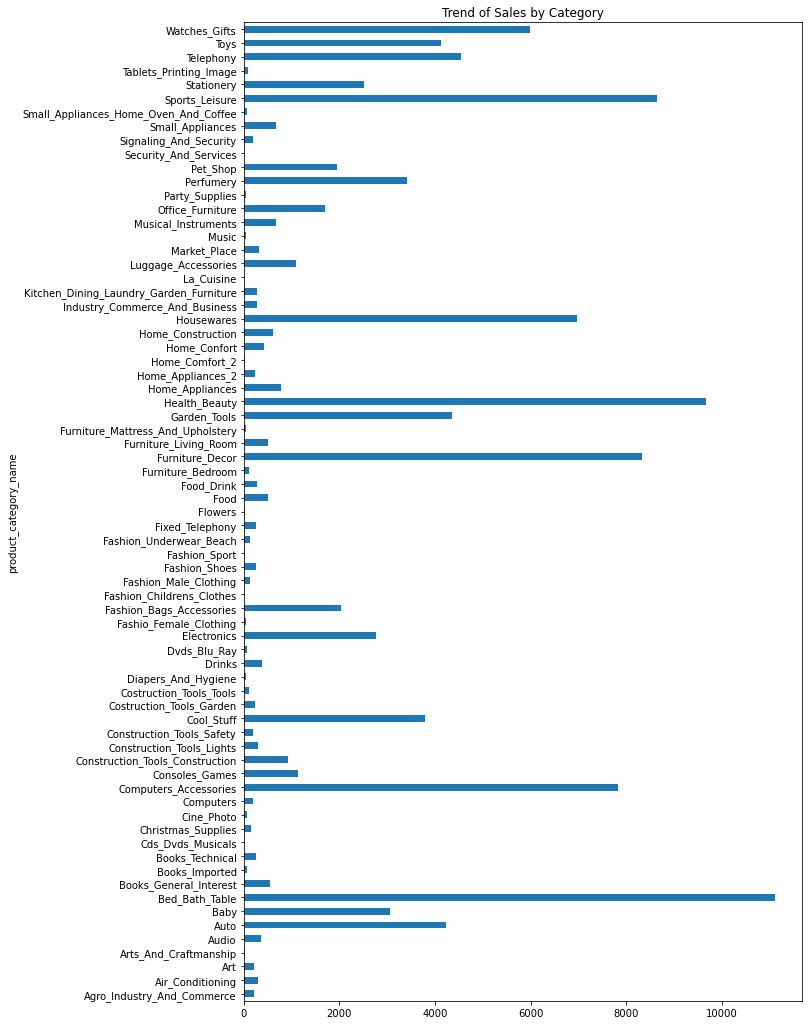

In [43]:
# Sales trend by category

sales_cat = pd.merge(pd.merge(orders, order_items, on = 'order_id'), products, on = 'product_id')
sales_cat.groupby('product_category_name')['order_id'].count().plot.barh(figsize = (10, 18), title = 'Trend of Sales by Category')

<AxesSubplot:title={'center':'Location Wise Sales Trend'}, xlabel='customer_state'>

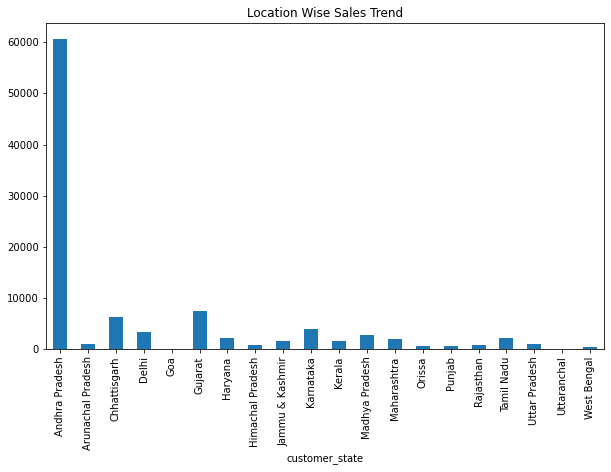

In [44]:
# Sales trend by location

sales_loc = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'left')
sales_loc.groupby('customer_state')['order_id'].count().plot.bar(figsize = (10, 6), title = 'Location Wise Sales Trend')

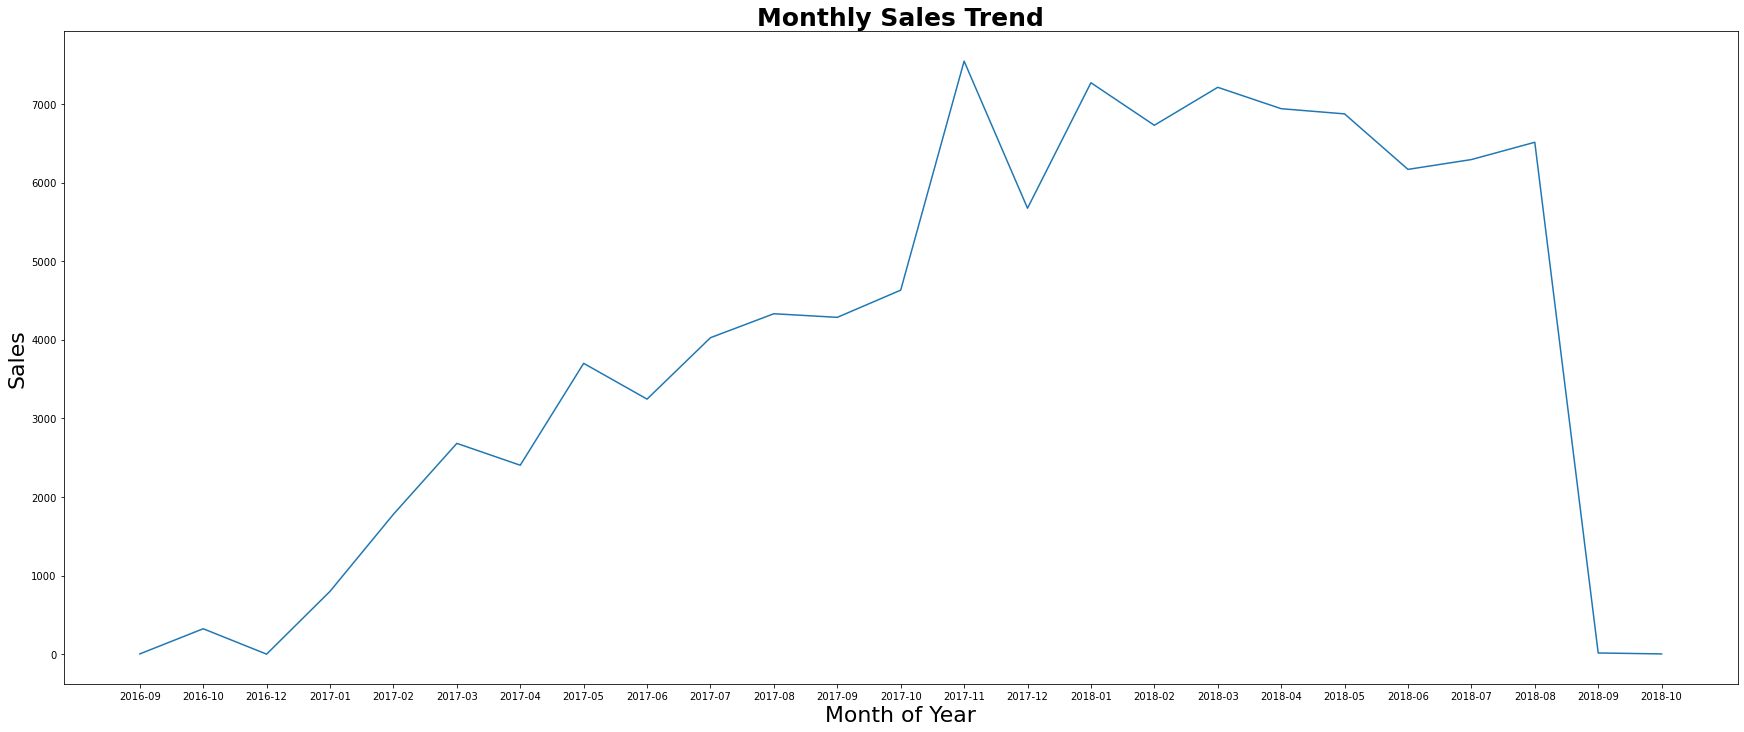

In [45]:
# Sales trend by month

sales_monthly = orders.copy()
sales_monthly['year_month'] = sales_monthly['order_purchase_timestamp'].dt.strftime('%Y-%m')
sales_monthly = sales_monthly.groupby('year_month')['order_id'].count().reset_index()

plt.figure(figsize = (30,12))
plt.plot(sales_monthly['year_month'], sales_monthly['order_id'])
plt.title('Monthly Sales Trend', fontweight='bold', fontsize=25)
plt.xlabel('Month of Year', fontsize = 22)
plt.ylabel('Sales', fontsize = 22)
plt.show()

#sales_monthly = orders.copy()
#sales_monthly['year_month'] = sales_monthly['order_purchase_timestamp'].dt.strftime('%Y-%m')
#sales_monthly.groupby('year_month')['order_id'].count().plot.line(figsize = (11,6), title = 'Trend of Sales by Month')


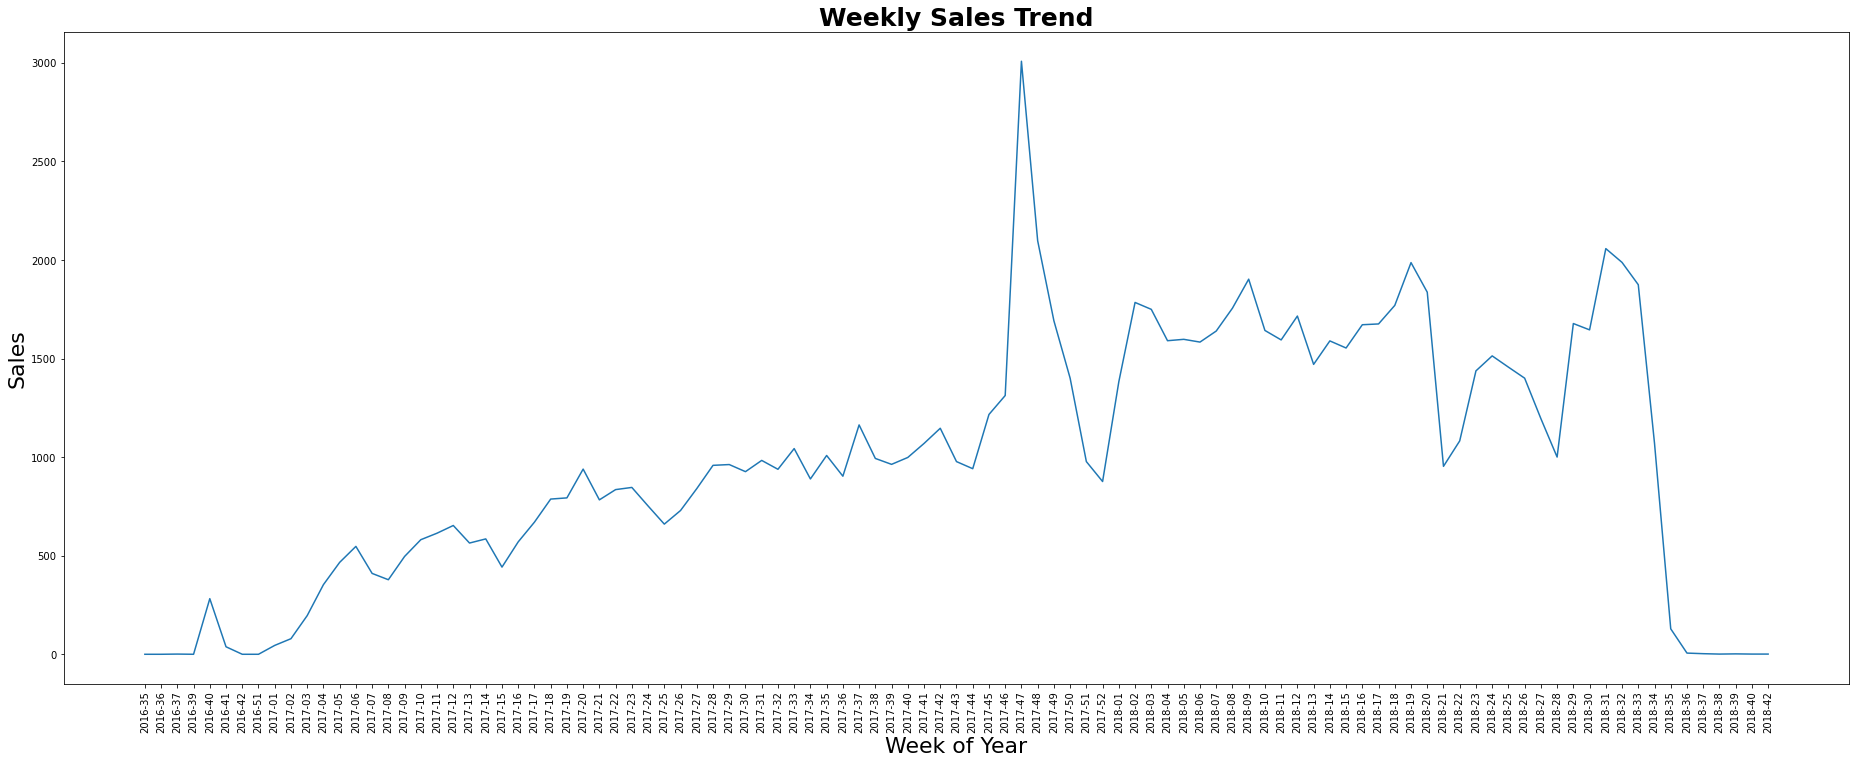

In [46]:
# Sales trend by week

sales_weekly = orders.copy()
sales_weekly['purchase_week'] = sales_weekly['order_purchase_timestamp'].dt.strftime('%Y-%W')
sales_weekly = sales_weekly.groupby('purchase_week')['order_id'].count().reset_index()

plt.figure(figsize = (32,12))
plt.plot(sales_weekly['purchase_week'], sales_weekly['order_id'])
plt.title('Weekly Sales Trend', fontweight='bold', fontsize=25)
plt.xlabel('Week of Year', fontsize = 22)
plt.ylabel('Sales', fontsize = 22)
plt.xticks(rotation=90)
plt.show()

# orders_monthly = orders.copy()
# orders_monthly['purchase_week'] = orders_monthly['order_purchase_timestamp'].dt.strftime('%W')
# orders_monthly.groupby('purchase_week')['order_id'].count().plot.line(figsize = (11,6), title = 'Trend of Sales by Week')

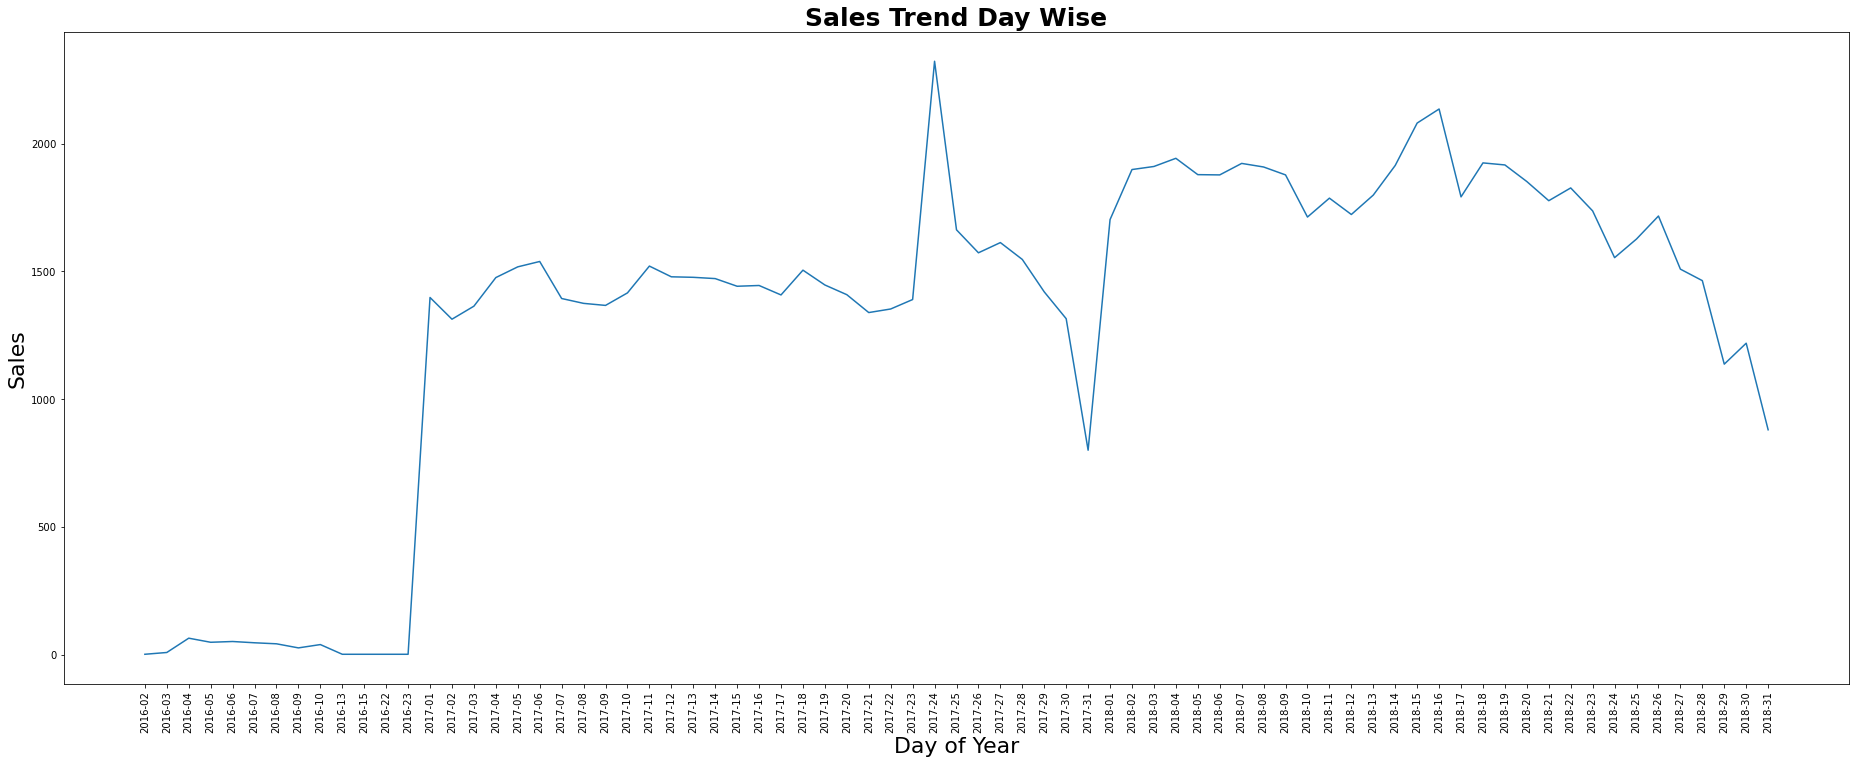

In [47]:
# Sales trend by day

sales_day = orders.copy()
sales_day['year_day'] = sales_day['order_purchase_timestamp'].dt.strftime('%Y-%d')
sales_day = sales_day.groupby('year_day')['order_id'].count().reset_index()

plt.figure(figsize = (32,12))
plt.plot(sales_day['year_day'], sales_day['order_id'])
plt.title('Sales Trend Day Wise', fontweight='bold', fontsize=25)
plt.xlabel('Day of Year', fontsize = 22)
plt.ylabel('Sales', fontsize = 22)
plt.xticks(rotation=90)
plt.show()

# orders_monthly = orders.copy()
# orders_monthly['year_day'] = orders_monthly['order_purchase_timestamp'].dt.strftime('%Y-%d')
# orders_monthly.groupby('year_day')['order_id'].count().plot.line(figsize = (11,6), title = 'Trend of Sales by Day')

<AxesSubplot:title={'center':'Sales Trend by Day Time'}, xlabel='time_range'>

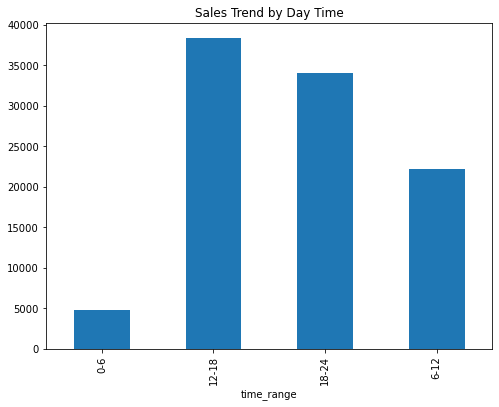

In [48]:
# sales trend by time

import datetime
sales_time = orders.copy()
sales_time['time_range'] = ''
sales_time.loc[(orders_["order_purchase_timestamp"].dt.time>=datetime.time(0, 0)) &
              (orders_["order_purchase_timestamp"].dt.time<=datetime.time(6, 0)), 'time_range'] = '0-6'
sales_time.loc[(orders_["order_purchase_timestamp"].dt.time>=datetime.time(6, 0)) &
              (orders_["order_purchase_timestamp"].dt.time<=datetime.time(12, 0)), 'time_range'] = '6-12'
sales_time.loc[(orders_["order_purchase_timestamp"].dt.time>=datetime.time(12, 0)) &
              (orders_["order_purchase_timestamp"].dt.time<=datetime.time(18, 0)), 'time_range'] = '12-18'
sales_time.loc[(orders_["order_purchase_timestamp"].dt.time>=datetime.time(18, 0)), 'time_range'] = '18-24'

sales_time.groupby('time_range')['order_id'].count().plot.bar(title = 'Sales Trend by Day Time', figsize = (8,6))

<AxesSubplot:title={'center':'Sales Trend by Payment Method'}, ylabel='order_id'>

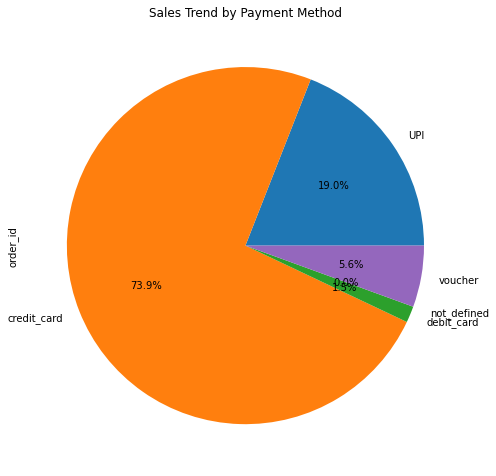

In [49]:
# sales trend by payment method

sales_payment = orders.copy()
sales_payment = sales_payment.join(order_payments.set_index(['order_id']), on = ['order_id'])
sales_payment.groupby(['payment_type'])['order_id'].count().plot.pie(autopct = '%.1f%%', figsize = (8, 10), title = 'Sales Trend by Payment Method')

<AxesSubplot:title={'center':'Sales Trend by Payment Method'}, xlabel='payment_type'>

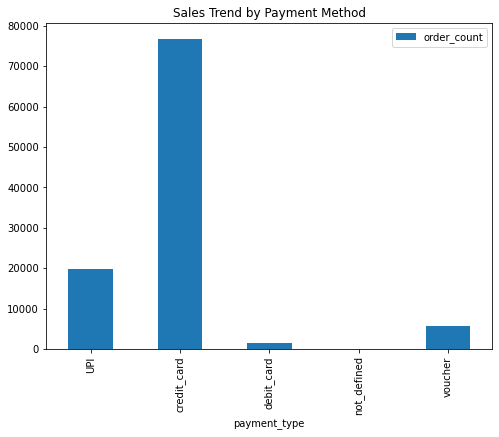

In [50]:
sales_payment = orders.copy()
sales_payment = sales_payment.join(order_payments.set_index(["order_id"]), on=["order_id"])
sales_payment.groupby(["payment_type"]).agg(order_count=("order_id", "count")).plot.bar(title = 'Sales Trend by Payment Method', figsize=(8, 6))

### (f) Popular Products by month, seller, state, category.

In [51]:
# Popular Products by Month

products_month = pd.merge(left = orders, right = order_items, on = 'order_id', how = 'left')
products_month['purchase_month'] = products_month['order_purchase_timestamp'].dt.strftime('%Y-%m')
products_month.groupby('purchase_month')['product_id'].agg(pd.Series.mode).to_frame()

,product_id
purchase_month,
2016-09,5a6b04657a4c5ee34285d1e4619a96b4
2016-10,eba7488e1c67729f045ab43fac426f2e
2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0
2017-01,37eb69aca8718e843d897aa7b82f462d
2017-02,a703f5ade6e4fae527357132230ea778
2017-03,7e0dc102074f8285580c9777f79c90cf
2017-04,99a4788cb24856965c36a24e339b6058
2017-05,99a4788cb24856965c36a24e339b6058
2017-06,42a2c92a0979a949ca4ea89ec5c7b934


In [52]:
# Popular Products by Seller

products_seller = pd.merge(pd.merge(orders, order_items, on = 'order_id'), sellers, on = 'seller_id')
products_seller.groupby('seller_id')['product_id'].agg(pd.Series.mode).to_frame()

,product_id
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8
001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e
001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc
002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d
003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80
...,...
ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e
ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b
ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918


In [53]:
# Popular Products by State

products_state = pd.merge(pd.merge(orders, order_items, on = 'order_id'), customers, on = 'customer_id')
products_state.groupby('customer_state')['product_id'].agg(pd.Series.mode).to_frame()

,product_id
customer_state,
Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af
Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff
Chhattisgarh,"[368c6c730842d78016ad823897a372db, 422879e10f4..."
Delhi,53759a2ecddad2bb87a079a1f1519f73
Goa,"[2a5806f10d0f00e5ad032dd2e3c8806e, 3db53484d66..."
Gujarat,"[53759a2ecddad2bb87a079a1f1519f73, aca2eb7d00e..."
Haryana,2b4609f8948be18874494203496bc318
Himachal Pradesh,"[422879e10f46682990de24d770e7f83d, 4316b712956..."
Jammu & Kashmir,89b190a046022486c635022524a974a8


In [54]:
# Popular Products by Category

products_cat = pd.merge(pd.merge(orders, order_items, on = 'order_id'), products, on = 'product_id')
products_cat.groupby('product_category_name')['product_id'].agg(pd.Series.mode).to_frame()

,product_id
product_category_name,
Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed
Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb
Art,4fe644d766c7566dbc46fb851363cb3b
Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475
Audio,db5efde3ad0cc579b130d71c4b2db522
...,...
Stationery,fb55982be901439613a95940feefd9ee
Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4
Telephony,e7cc48a9daff5436f63d3aad9426f28b


### (g) Popular categories by state, month

In [55]:
# Popular categories by state

cat_state = pd.merge(pd.merge(pd.merge(orders, order_items, on = 'order_id'), products, on = 'product_id'), customers, on = 'customer_id')
cat_state.groupby('customer_state')['product_category_name'].agg(pd.Series.mode).to_frame()

,product_category_name
customer_state,
Andhra Pradesh,Bed_Bath_Table
Arunachal Pradesh,Bed_Bath_Table
Chhattisgarh,Bed_Bath_Table
Delhi,Health_Beauty
Goa,"[Auto, Construction_Tools_Construction, Cool_S..."
Gujarat,Bed_Bath_Table
Haryana,Bed_Bath_Table
Himachal Pradesh,Bed_Bath_Table
Jammu & Kashmir,Bed_Bath_Table


In [56]:
# Popular categories by month

cat_month = pd.merge(pd.merge(pd.merge(orders, order_items, on = 'order_id'), products, on = 'product_id'), customers, on = 'customer_id')
cat_month['year_month'] = cat_month['order_purchase_timestamp'].dt.strftime('%Y-%m')
cat_month.groupby('year_month')['product_category_name'].agg(pd.Series.mode).to_frame()

,product_category_name
year_month,
2016-09,Health_Beauty
2016-10,Furniture_Decor
2016-12,Fashion_Bags_Accessories
2017-01,Furniture_Decor
2017-02,Furniture_Decor
2017-03,Furniture_Decor
2017-04,Bed_Bath_Table
2017-05,Bed_Bath_Table
2017-06,Bed_Bath_Table


### (h) List top 10 most expensive products sorted by price

In [57]:
top10_products = pd.merge(pd.merge(orders, order_items, on = 'order_id'), products, on = 'product_id')
top10_products.groupby('product_category_name')['price'].sum().sort_values(ascending = False).reset_index().head(10)

,product_category_name,price
0,Health_Beauty,1258681.34
1,Watches_Gifts,1205005.68
2,Bed_Bath_Table,1036988.68
3,Sports_Leisure,988048.97
4,Computers_Accessories,911954.32
5,Furniture_Decor,729762.49
6,Cool_Stuff,635290.85
7,Housewares,632248.66
8,Auto,592720.11
9,Garden_Tools,485256.46


### 2. Performing Customers/sellers Segmentation
### (a) Divide the customers into groups based on the revenue generated.

In [58]:
## dividing customers on the basis of revenue by percentile in four categories :
    ## category1 ==> highest revenue generating customers 75%le and above
    ## category2 ==> high revenue generating customers 50%le to 75%le
    ## category3 ==> medium revenue generating customers 25%le to 50%le
    ## category4 ==> low revenue generating customers 0%le to 25%le
    
cust_revenue = pd.merge(pd.merge(orders, order_payments, on = 'order_id'), customers, on = 'customer_id')
cust_revenue = cust_revenue.groupby('customer_id')['payment_value'].sum().sort_values(ascending = False).reset_index()
cust_revenue['customers_category'] = pd.qcut(cust_revenue['payment_value'], q = [0, 0.25, 0.50, 0.75, 1], labels = ['category4', 'category3', 'category2', 'category1'])
cust_revenue

,customer_id,payment_value,customers_category
0,1617b1357756262bfa56ab541c47bc16,13664.08,category1
1,ec5b2ba62e574342386871631fafd3fc,7274.88,category1
2,c6e2731c5b391845f6800c97401a43a9,6929.31,category1
3,f48d464a0baaea338cb25f816991ab1f,6922.21,category1
4,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,category1
...,...,...,...
99435,184e8e8e48937145eb96c721ef1f0747,10.07,category4
99436,a790343ca6f3fee08112d678b43aa7c5,9.59,category4
99437,a73c1f73f5772cf801434bf984b0b1a7,0.00,category4
99438,3532ba38a3fd242259a514ac2b6ae6b6,0.00,category4


### (b) Divide the sellers into groups based on the revenue generated.

In [59]:
## dividing sellers on the basis of revenue by percentile in four categories :
    ## category1 ==> highest revenue generating sellers 75%le and above
    ## category2 ==> high revenue generating sellers 50%le to 75%le
    ## category3 ==> medium revenue generating sellers 25%le to 50%le
    ## category4 ==> low revenue generating sellers 0%le to 25%le
    
sellers_revenue = pd.merge(pd.merge(orders, order_payments, on = 'order_id'), order_items, on = 'order_id')
sellers_revenue = sellers_revenue.groupby('seller_id')['payment_value'].sum().sort_values(ascending = False).reset_index()
sellers_revenue['sellers_category'] = pd.qcut(sellers_revenue['payment_value'], q = [0, 0.25, 0.50, 0.75, 1], labels = ['category4', 'category3', 'category2', 'category1'])
sellers_revenue

,seller_id,payment_value,sellers_category
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,category1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,category1
2,4a3ca9315b744ce9f8e9374361493884,301245.27,category1
3,1f50f920176fa81dab994f9023523100,290253.42,category1
4,53243585a1d6dc2643021fd1853d8905,284903.08,category1
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,category4
3091,702835e4b785b67a084280efca355756,18.56,category4
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,category4
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,category4


### 3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)

In [189]:
orders_ = pd.merge(pd.merge(orders, order_items, how='left', on='order_id'), products, on = 'product_id')

In [190]:
orders_ = orders_[orders_[['order_purchase_timestamp','customer_id']].duplicated(keep = False)]

In [191]:
orders_['product_bundle'] = orders_.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))
orders_.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_bundle
28,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:00,2018-08-21 10:50:00,2018-08-22 15:21:00,2018-08-28 18:58:00,2018-09-10,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.75,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."
29,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:00,2018-08-21 10:50:00,2018-08-22 15:21:00,2018-08-28 18:58:00,2018-09-10,2.0,595fac2a385ac33a80bd5114aec74eb8,...,22.75,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."
30,78037c5f4d9f1f7bab0207f22c4e92f1,ec8f2dcb080511771e52af7ca42117f5,delivered,2018-01-02 17:56:00,2018-01-02 18:10:00,2018-01-08 17:19:00,2018-01-16 17:12:00,2018-01-31,1.0,595fac2a385ac33a80bd5114aec74eb8,...,12.83,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."
31,78037c5f4d9f1f7bab0207f22c4e92f1,ec8f2dcb080511771e52af7ca42117f5,delivered,2018-01-02 17:56:00,2018-01-02 18:10:00,2018-01-08 17:19:00,2018-01-16 17:12:00,2018-01-31,2.0,595fac2a385ac33a80bd5114aec74eb8,...,12.83,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."
38,9883744c6400cfad8a620ddb82b9793c,df7f0c302322f4a233a07fb9cbddb46c,delivered,2018-05-02 10:19:00,2018-05-02 10:34:00,2018-05-07 11:32:00,2018-05-08 21:06:00,2018-05-24,1.0,595fac2a385ac33a80bd5114aec74eb8,...,15.72,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."


In [192]:
orders_ = orders_[['order_id', 'product_bundle']].drop_duplicates()
orders_.head()

,order_id,product_bundle
28,d543201a9b42a1402ff97e65b439a48b,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."
30,78037c5f4d9f1f7bab0207f22c4e92f1,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."
38,9883744c6400cfad8a620ddb82b9793c,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."
49,70b552ddd260593a445a635431384e35,"595fac2a385ac33a80bd5114aec74eb8,0e2d365a247d1..."
61,f4d33a3db484fba77b5f1f1990fb3445,"595fac2a385ac33a80bd5114aec74eb8,595fac2a385ac..."


In [193]:
# using itertool and collection libraries

count = Counter()

for row in orders_['product_bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))   #counting all the 2 products bundle
print(count)

Counter({('422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d'): 279, ('ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3'): 195, ('9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4'): 190, ('a62e25e09e05e6faf31d90c6ec1aa3d1', 'a62e25e09e05e6faf31d90c6ec1aa3d1'): 141, ('368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db'): 139, ('b532349fe46b38fbc7bb3914c1bdae07', 'b532349fe46b38fbc7bb3914c1bdae07'): 134, ('d5991653e037ccb7af6ed7d94246b249', 'd5991653e037ccb7af6ed7d94246b249'): 123, ('53759a2ecddad2bb87a079a1f1519f73', '53759a2ecddad2bb87a079a1f1519f73'): 119, ('89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8'): 115, ('aca2eb7d00ea1a7b8ebd4e68314663af', 'aca2eb7d00ea1a7b8ebd4e68314663af'): 111, ('389d119b48cf3043d311335e499d9c6b', '389d119b48cf3043d311335e499d9c6b'): 108, ('37eb69aca8718e843d897aa7b82f462d', '37eb69aca8718e843d897aa7b82f462d'): 105, ('270516a3f41dc035aa87d220228f844c', '05b51

In [195]:
count.most_common(10)

[(('422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d'),
  279),
 (('ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3'),
  195),
 (('9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4'),
  190),
 (('a62e25e09e05e6faf31d90c6ec1aa3d1', 'a62e25e09e05e6faf31d90c6ec1aa3d1'),
  141),
 (('368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db'),
  139),
 (('b532349fe46b38fbc7bb3914c1bdae07', 'b532349fe46b38fbc7bb3914c1bdae07'),
  134),
 (('d5991653e037ccb7af6ed7d94246b249', 'd5991653e037ccb7af6ed7d94246b249'),
  123),
 (('53759a2ecddad2bb87a079a1f1519f73', '53759a2ecddad2bb87a079a1f1519f73'),
  119),
 (('89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8'),
  115),
 (('aca2eb7d00ea1a7b8ebd4e68314663af', 'aca2eb7d00ea1a7b8ebd4e68314663af'),
  111)]

In [ ]:
---------------------------------------------------------------------------------------

In [134]:
orders_ = pd.merge(pd.merge(orders, order_items, how='left', on='order_id'), products, on = 'product_id')

In [135]:
orders_ = orders_[orders_[['order_purchase_timestamp','customer_id']].duplicated(keep = False)]

In [127]:
orders_.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  2
order_delivered_carrier_date     290
order_delivered_customer_date    431
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name            321
product_name_lenght              316
product_description_lenght       316
product_photos_qty               316
product_weight_g                   4
product_length_cm                  4
product_height_cm                  4
product_width_cm                   4
dtype: int64

In [136]:
orders_.dropna(subset=['product_category_name'], inplace = True)

In [137]:
orders_['product_bundle'] = orders_.groupby(['order_id'])['product_category_name'].transform(lambda x: ','.join(x))

In [138]:
orders_ = orders_[['product_bundle']].drop_duplicates()
orders_.head()

,product_bundle
28,"Perfumery,Perfumery"
114,"Pet_Shop,Pet_Shop"
120,"Stationery,Stationery"
132,"Stationery,Stationery,Stationery,Stationery"
158,"Auto,Auto"


In [139]:
# using itertool and collection libraries

count = Counter()

for row in orders_['product_bundle']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))   #counting all the 2 products bundle
print(count)

Counter({('Garden_Tools', 'Garden_Tools'): 314, ('Computers_Accessories', 'Computers_Accessories'): 308, ('Furniture_Decor', 'Furniture_Decor'): 293, ('Health_Beauty', 'Health_Beauty'): 260, ('Housewares', 'Housewares'): 260, ('Auto', 'Auto'): 232, ('Bed_Bath_Table', 'Bed_Bath_Table'): 208, ('Telephony', 'Telephony'): 206, ('Office_Furniture', 'Office_Furniture'): 193, ('Baby', 'Baby'): 114, ('Construction_Tools_Construction', 'Construction_Tools_Construction'): 106, ('Watches_Gifts', 'Watches_Gifts'): 101, ('Drinks', 'Drinks'): 90, ('Furniture_Living_Room', 'Furniture_Living_Room'): 82, ('Sports_Leisure', 'Sports_Leisure'): 66, ('Fixed_Telephony', 'Fixed_Telephony'): 60, ('Pet_Shop', 'Pet_Shop'): 57, ('Cool_Stuff', 'Cool_Stuff'): 57, ('Garden_Tools', 'Furniture_Decor'): 46, ('Toys', 'Toys'): 41, ('Home_Construction', 'Home_Construction'): 40, ('Perfumery', 'Perfumery'): 38, ('Construction_Tools_Lights', 'Construction_Tools_Lights'): 38, ('Furniture_Decor', 'Bed_Bath_Table'): 37, ('Sta

In [104]:
orders_['product_bundle']

28                                      Perfumery,Perfumery
30                                      Perfumery,Perfumery
38                                      Perfumery,Perfumery
49                                      Perfumery,Perfumery
61                                      Perfumery,Perfumery
                                ...                        
112559                  Furniture_Bedroom,Furniture_Bedroom
112620                        Sports_Leisure,Sports_Leisure
112624    Computers_Accessories,Computers_Accessories,Co...
112631    Furniture_Decor,Furniture_Decor,Furniture_Deco...
112645                        Sports_Leisure,Sports_Leisure
Name: product_bundle, Length: 9699, dtype: object

In [84]:
orders_.to_csv('file_name.csv')

In [140]:
count.most_common(10)

[(('Garden_Tools', 'Garden_Tools'), 314),
 (('Computers_Accessories', 'Computers_Accessories'), 308),
 (('Furniture_Decor', 'Furniture_Decor'), 293),
 (('Health_Beauty', 'Health_Beauty'), 260),
 (('Housewares', 'Housewares'), 260),
 (('Auto', 'Auto'), 232),
 (('Bed_Bath_Table', 'Bed_Bath_Table'), 208),
 (('Telephony', 'Telephony'), 206),
 (('Office_Furniture', 'Office_Furniture'), 193),
 (('Baby', 'Baby'), 114)]

In [ ]:
-------------------------

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations,combinations
from collections import Counter

In [162]:
orders_ = pd.merge(orders, order_items, how='left', on='order_id')

In [153]:
#create a function that finds pairs and list them in a column. Using A and B as a stand in
def find_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values,2)),columns=["A","B"])
    return pairs

In [164]:
orders_ = orders_.head(1000)

In [165]:
#Group the products by Order ID then apply the function 
dataset_combo =orders_.groupby('order_id')['product_id'].apply(find_pairs).reset_index(drop=True)
dataset_combo.head()

,A,B
0,8695c431b31927efef5343e675f279e7,8695c431b31927efef5343e675f279e7
1,8695c431b31927efef5343e675f279e7,8695c431b31927efef5343e675f279e7
2,42a2bd596fda1baef5719cb74f73030c,283dc451ad3918badb976d56ff887289
3,283dc451ad3918badb976d56ff887289,42a2bd596fda1baef5719cb74f73030c
4,12bc892d6fff0dc42c8177f3665ef00e,12bc892d6fff0dc42c8177f3665ef00e


In [166]:
#  Calculate how often each item item_a occurs with the items in item_b
dataset_combo2 =dataset_combo.groupby(['A','B']).size()
dataset_combo2

A                                 B                               
027325f946f1b3d8f94c3496e9a59a10  027325f946f1b3d8f94c3496e9a59a10    2
                                  482c25dc8512547962854dfff5ac057b    4
028b0b0277744a9eaa2c4f57c24dcb68  028b0b0277744a9eaa2c4f57c24dcb68    2
04a4e9d8c0dc6b2b4b8e24ea78a8f318  04a4e9d8c0dc6b2b4b8e24ea78a8f318    2
                                  c7079d23bead81759eb7c670b96728bc    2
                                                                     ..
f48eb5c2fde13ca63664f0bb05f55346  f48eb5c2fde13ca63664f0bb05f55346    2
f889fb87b505b73de10c18b93352469f  51c59cf09066762ba5740772b0a86215    1
f9be8e0e5acd947d8f49dbc390b9ab20  b935c4a30d29406e3633e74b9b887307    1
fd424396761d9e1609c5516b7d8ce17b  fd424396761d9e1609c5516b7d8ce17b    2
fde90f06296b26995fd0de6f16610d70  6d68112743e7ed2de3932554b033f544    1
Length: 161, dtype: int64

In [167]:
#create a sorted dataframe by the most frequent combinations.
dataset =dataset_combo2.reset_index()
dataset.columns = ['A','B',"Size"]
dataset.sort_values(by='Size',ascending =False, inplace =True)
dataset.head()

,A,B,Size
25,22594ba8fd9a72ad95d352929c821560,22594ba8fd9a72ad95d352929c821560,30
24,216bb0e0cd43ffd832e0973d35e0377e,216bb0e0cd43ffd832e0973d35e0377e,30
33,2c4930c4b284c7b99db2a4c52071a45e,2c4930c4b284c7b99db2a4c52071a45e,20
107,a5a0e71a81ae65aa335e71c06261e260,a5a0e71a81ae65aa335e71c06261e260,20
12,1454b29e83ab2f8bf6b4102736498ff5,1454b29e83ab2f8bf6b4102736498ff5,20


In [168]:
#Clean the Product row and check the head of the data
Cleaned_Dataset = dataset[dataset["A"]!="Product"]
Cleaned_Dataset.head()

,A,B,Size
25,22594ba8fd9a72ad95d352929c821560,22594ba8fd9a72ad95d352929c821560,30
24,216bb0e0cd43ffd832e0973d35e0377e,216bb0e0cd43ffd832e0973d35e0377e,30
33,2c4930c4b284c7b99db2a4c52071a45e,2c4930c4b284c7b99db2a4c52071a45e,20
107,a5a0e71a81ae65aa335e71c06261e260,a5a0e71a81ae65aa335e71c06261e260,20
12,1454b29e83ab2f8bf6b4102736498ff5,1454b29e83ab2f8bf6b4102736498ff5,20


In [177]:
orders_ = pd.merge(pd.merge(orders, order_items, how='left', on='order_id'), products, on = 'product_id')
orders_.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:00,2017-08-15 20:05:00,2017-08-17 15:28:00,2017-08-18 14:44:00,2017-08-28,1.0,87285b34884572647811a353c7ac498a,...,29.99,7.78,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:00,2017-08-02 18:43:00,2017-08-04 17:35:00,2017-08-07 18:30:00,2017-08-15,1.0,87285b34884572647811a353c7ac498a,...,29.99,7.78,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:00,2017-10-25 02:14:00,2017-10-27 16:48:00,2017-11-07 18:04:00,2017-11-13,1.0,87285b34884572647811a353c7ac498a,...,29.99,14.10,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0


In [ ]:
---------------------------------------------------------------------------

In [181]:
orders_ = pd.merge(pd.merge(orders, order_items, how='left', on='order_id'), products, on = 'product_id')

In [182]:
#Create a combination of groups so that can be used as an alternative to pairing
df2=orders_
df2= df2.dropna()
df2 =df2[df2['order_id'].duplicated(keep=False)]
df2['Group'] = df2.groupby('order_id')['product_category_name'].transform(lambda x:','.join(x))
df2 =df2[['order_id', 'Group']].drop_duplicates()
df2.head()

,order_id,Group
28,d543201a9b42a1402ff97e65b439a48b,"Perfumery,Perfumery"
30,78037c5f4d9f1f7bab0207f22c4e92f1,"Perfumery,Perfumery"
38,9883744c6400cfad8a620ddb82b9793c,"Perfumery,Perfumery"
49,70b552ddd260593a445a635431384e35,"Perfumery,Perfumery"
61,f4d33a3db484fba77b5f1f1990fb3445,"Perfumery,Perfumery"


In [183]:
#Count each row combination by the the pairing of the two
count = Counter()
for row in df2['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count

Counter({('Perfumery', 'Perfumery'): 347,
         ('Pet_Shop', 'Pet_Shop'): 321,
         ('Stationery', 'Stationery'): 260,
         ('Auto', 'Auto'): 611,
         ('Furniture_Decor', 'Furniture_Decor'): 2969,
         ('Garden_Tools', 'Garden_Tools'): 1428,
         ('Bed_Bath_Table', 'Bed_Bath_Table'): 2353,
         ('Toys', 'Toys'): 290,
         ('Health_Beauty', 'Health_Beauty'): 1327,
         ('Cool_Stuff', 'Baby'): 11,
         ('Baby', 'Baby'): 284,
         ('Watches_Gifts', 'Watches_Gifts'): 577,
         ('Watches_Gifts', 'Electronics'): 2,
         ('Electronics', 'Computers_Accessories'): 5,
         ('Garden_Tools', 'Computers_Accessories'): 7,
         ('Garden_Tools', 'Housewares'): 12,
         ('Furniture_Decor', 'Housewares'): 18,
         ('Books_General_Interest', 'Books_General_Interest'): 53,
         ('Small_Appliances', 'Small_Appliances'): 63,
         ('Sports_Leisure', 'Sports_Leisure'): 1214,
         ('Sports_Leisure', 'Furniture_Decor'): 1,
         

In [184]:
#check out the most common combination. 
for key, value in count.most_common(10):
    print(key,value)

('Furniture_Decor', 'Furniture_Decor') 2969
('Bed_Bath_Table', 'Bed_Bath_Table') 2353
('Housewares', 'Housewares') 1951
('Computers_Accessories', 'Computers_Accessories') 1944
('Garden_Tools', 'Garden_Tools') 1428
('Health_Beauty', 'Health_Beauty') 1327
('Sports_Leisure', 'Sports_Leisure') 1214
('Office_Furniture', 'Office_Furniture') 820
('Auto', 'Auto') 611
('Telephony', 'Telephony') 580


In [ ]:
-----------------------------------------------------------------------------------------

In [185]:
orders_ = pd.merge(orders, order_items, how='left', on='order_id')

In [186]:
#Create a combination of groups so that can be used as an alternative to pairing
df2=orders_
df2= df2.dropna()
df2 =df2[df2['order_id'].duplicated(keep=False)]
df2['Group'] = df2.groupby('order_id')['product_id'].transform(lambda x:','.join(x))
df2 =df2[['order_id', 'Group']].drop_duplicates()
df2.head()

,order_id,Group
10,e6ce16cb79ec1d90b1da9085a6118aeb,"08574b074924071f4e201e151b152b4e,08574b0749240..."
27,acce194856392f074dbf9dada14d8d82,"d70f38e7f79c630f8ea00c993897042c,9451e630d725c..."
54,9faeb9b2746b9d7526aef5acb08e2aa0,"f48eb5c2fde13ca63664f0bb05f55346,f48eb5c2fde13..."
60,66e4624ae69e7dc89bd50222b59f581f,"b37b72d5a56f887725c2862184b8cab8,b37b72d5a56f8..."
68,688052146432ef8253587b930b01a06d,"d1c427060a0f73f6b889a5c7c61f2ac4,db56f6d2b04c8..."


In [187]:
#Count each row combination by the the pairing of the two
count = Counter()
for row in df2['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count

Counter({('08574b074924071f4e201e151b152b4e',
          '08574b074924071f4e201e151b152b4e'): 17,
         ('d70f38e7f79c630f8ea00c993897042c',
          '9451e630d725c4bb7a5a206b48b99486'): 1,
         ('f48eb5c2fde13ca63664f0bb05f55346',
          'f48eb5c2fde13ca63664f0bb05f55346'): 1,
         ('b37b72d5a56f887725c2862184b8cab8',
          'b37b72d5a56f887725c2862184b8cab8'): 1,
         ('d1c427060a0f73f6b889a5c7c61f2ac4',
          'db56f6d2b04c89eae4daba188842fd7b'): 1,
         ('d457916b4fdc60154ed93b5dd3e6fd69',
          'd457916b4fdc60154ed93b5dd3e6fd69'): 1,
         ('a659cb33082b851fb87a33af8f0fff29',
          'a659cb33082b851fb87a33af8f0fff29'): 27,
         ('a5a0e71a81ae65aa335e71c06261e260',
          'a5a0e71a81ae65aa335e71c06261e260'): 10,
         ('75d6b6963340c6063f7f4cfcccfe6a30',
          '75d6b6963340c6063f7f4cfcccfe6a30'): 2,
         ('c3ba4e8d3cb30049213b682e751e9d00',
          'c3ba4e8d3cb30049213b682e751e9d00'): 2,
         ('425db55cb3b0f5b18a2d9964da

In [188]:
#check out the most common combination. 
for key, value in count.most_common(10):
    print(key,value)

('422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d') 279
('ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3') 195
('9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4') 190
('a62e25e09e05e6faf31d90c6ec1aa3d1', 'a62e25e09e05e6faf31d90c6ec1aa3d1') 141
('368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db') 139
('b532349fe46b38fbc7bb3914c1bdae07', 'b532349fe46b38fbc7bb3914c1bdae07') 133
('d5991653e037ccb7af6ed7d94246b249', 'd5991653e037ccb7af6ed7d94246b249') 123
('53759a2ecddad2bb87a079a1f1519f73', '53759a2ecddad2bb87a079a1f1519f73') 119
('89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8') 115
('aca2eb7d00ea1a7b8ebd4e68314663af', 'aca2eb7d00ea1a7b8ebd4e68314663af') 110


In [ ]:
------------------------------------------------------------------------------------------

In [108]:
orders_order_items = pd.merge(orders , order_items , how='left' , on='order_id' )
orders_order_items.head(2)
cross_selling = orders_order_items[orders_order_items.duplicated(['order_purchase_timestamp','customer_id'],
                                                                 keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],
                                                       keep=False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

Products with same customer id and order purchase timestamp are cross selling


,customer_id,order_purchase_timestamp,product_id
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,f293394c72c9b5fafd7023301fc21fc2
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,c1488892604e4ba5cff5b4eb4d595400
2,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
3,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
4,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
...,...,...,...
3566,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,7052c556fc966a2321d570f3c5a8790f
3567,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3568,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3569,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


### 4. Payment Behaviour
### (a) How customers are paying?

In [ ]:
order_payments.groupby('payment_type').agg(count = ('payment_type', 'count'))

### (b) Which payment channels are used by most customers?

In [ ]:
order_payments.groupby('payment_type').agg(count = ('payment_type', 'count')).plot.bar(figsize = (10, 6))

#### As per the above observation, "Credit Card" is used by most customers.

### 5. Customer satisfaction towards category & product
### (a) Which categories (top 10) are maximum rated & minimum rated?

In [ ]:
prod_cat = pd.merge(pd.merge(order_items, order_review_ratings, on = 'order_id'), products, on = 'product_id')

In [ ]:
# Top 10 Maximum Rated Categories

prod_cat.groupby('product_category_name')['review_score'].mean().sort_values(ascending = False).head(10).reset_index()

In [ ]:
# Top 10 Minimum Rated Categories

prod_cat.groupby('product_category_name')['review_score'].mean().sort_values(ascending = True).head(10).reset_index()

### (b) Which products (top10) are maximum rated & minimum rated?

In [ ]:
products_ = pd.merge(pd.merge(order_items, order_review_ratings, on = 'order_id'), products, on = 'product_id')

In [ ]:
# Top 10 Maximum Rated Products

products_.groupby('product_id')['review_score'].mean().sort_values(ascending = False).head(10).reset_index()

In [ ]:
# Top 10 Minimum Rated Products

products_.groupby('product_id')['review_score'].mean().sort_values(ascending = True).head(10).reset_index()

### (c) Average rating by location, seller, product, category, month etc.

In [ ]:
# Average rating by location

loc_ratings = pd.merge(pd.merge(orders, order_review_ratings, on = 'order_id'), customers, on = 'customer_id')
loc_ratings.groupby('customer_state')['review_score'].mean().sort_values(ascending = False).reset_index()

In [ ]:
# Average rating by seller

seller_ratings = pd.merge(order_items, order_review_ratings, on = 'order_id')
seller_ratings.groupby('seller_id')['review_score'].mean().sort_values(ascending = False).reset_index()

In [ ]:
# Average rating by product

product_ratings = pd.merge(order_items, order_review_ratings, on = 'order_id')
product_ratings.groupby('product_id')['review_score'].mean().reset_index()

In [ ]:
# Average rating by category

category_ratings = pd.merge(pd.merge(order_items, order_review_ratings, on = 'order_id'), products, on = 'product_id')
category_ratings.groupby('product_category_name')['review_score'].mean().reset_index()

In [ ]:
# Average rating by month

month_ratings = pd.merge(orders, order_review_ratings, on = 'order_id')
month_ratings['year_month'] = month_ratings['order_purchase_timestamp'].dt.strftime('%Y-%m')
month_ratings.groupby('year_month')['review_score'].mean().reset_index()

In [ ]:
month_ratings = order_review_ratings.copy()
month_ratings['year_month'] = month_ratings['review_creation_date'].dt.strftime('%Y-%m')
month_ratings.groupby('year_month')['review_score'].mean().reset_index()